<a href="https://colab.research.google.com/github/rightbin/Deep-learning/blob/main/Prophet%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_chicago_%EB%B2%94%EC%A3%84_%EC%98%88%EC%B8%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시카고 범죄율을 예측해 보자 ( Facebook 의 Prophet 라이브러리 활용 )





# STEP #0: PROBLEM STATEMENT

- The Chicago Crime dataset : 2001 ~ 2017. 
- Datasource: 캐글 https://www.kaggle.com/currie32/crimes-in-*chicago*
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.


### 페이스북에서 만든 오픈소스 Prophet 라이브러리

- Seasonal time series data를 분석할 수 있는 딥러닝 라이브러리다. 

- 프로펫 공식 레이지 : https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


### 코랩에는 자동으로 prophet이 설치되어 있다. 따라서 다른 환경에서 설치 되어있지 않다면, 다음처럼 설치하면 된다.

- pip install fbprophet
     
- 위의 pip 설치 시 에러가 나면 다음처럼 설치해 준다 : 
    conda install -c conda-forge fbprophet


# STEP #1: IMPORTING DATA

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Chicago_Crimes_2005_to_2007.csv 
# Chicago_Crimes_2008_to_2011.csv
# Chicago_Crimes_2012_to_2017.csv 파일을 읽되, 
# 각각 파라미터 error_bad_lines=False 추가 해준다.


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/day18')

In [ ]:
chicago_df_1 =  pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False,index_col=0)
chicago_df_2 =  pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False,index_col=0)
chicago_df_3 =  pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False,index_col=0)

b'Skipping line 533719: expected 23 fields, saw 24\n'
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [ ]:
# 데이터 모양을 보고, 이상한 부분은 처리해 준다.
chicago_df_1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254263,4673620,HM269120,04/04/2006 10:00:00 AM,002XX N KOLMAR AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False,1113,11.0,28.0,26.0,08B,1146037.0,1900783.0,2006,04/15/2016 08:55:02 AM,41.883735,-87.739200,"(41.883734918, -87.739199887)"
6254264,4673621,HM272803,04/04/2006 05:30:00 PM,034XX N MAJOR AVE,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,"SCHOOL, PUBLIC, BUILDING",False,False,1633,16.0,38.0,15.0,14,1137757.0,1922269.0,2006,04/15/2016 08:55:02 AM,41.942848,-87.769086,"(41.942848288, -87.769086168)"
6254265,4673622,HM271989,04/04/2006 06:40:30 PM,081XX S ELLIS AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,VACANT LOT/LAND,False,False,631,6.0,8.0,44.0,04B,1184311.0,1851174.0,2006,04/15/2016 08:55:02 AM,41.746791,-87.600210,"(41.746791148, -87.600209768)"
6254266,4673623,HM271676,04/04/2006 03:50:00 PM,057XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,STREET,False,False,2133,2.0,5.0,41.0,08B,1182559.0,1867082.0,2006,04/15/2016 08:55:02 AM,41.790485,-87.606137,"(41.79048504, -87.606136634)"


In [ ]:
print(chicago_df_1.shape)
print(chicago_df_2.shape)
print(chicago_df_3.shape)


(1872343, 22)
(2688710, 22)
(1456714, 22)


In [ ]:
chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3])

In [ ]:
chicago_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [ ]:
# 위의 3개 데이터프레임을 하나로 합친다. 
chicago_df =  


SyntaxError: ignored

# STEP #2: EXPLORING THE DATASET  

In [ ]:
# Let's view the head of the training dataset
chicago_df.head()

In [ ]:
# Let's view the last elements in the training dataset


### 비어있는 데이터가 얼마나 되는지 확인하시오.

In [ ]:
chicago_df.isna().sum()

### 다음 컬럼들을 삭제하시오.

'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'

In [ ]:
deleted_cols = ['Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude']

In [ ]:
chicago_df.drop(deleted_cols,axis=1,inplace=True)

In [ ]:
chicago_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
4,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
5,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [ ]:
chicago_df.isna().sum()

ID                         0
Date                       0
Block                      0
Primary Type               0
Description                0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

### Date 컬럼을 보니, 날짜 형식으로 되어있다. 이를 파이썬이 이해할 수 있는 날짜로 바꿔서 다시 Date 컬럼에 저장하시오. 

In [ ]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 6253474
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
 chicago_df['Date'] = pd.to_datetime(chicago_df['Date'],format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
chicago_df.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False


In [ ]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 6253474
Data columns (total 8 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(4)
memory usage: 492.9+ MB


### Date 컬럼을 인덱스로 만드시오.

In [ ]:
chicago_df.index = pd.DatetimeIndex(chicago_df['Date']) #datetime을 인덱스로 하게 되면 비어있는 컬럼도 인덱싱이 가능하기 때문이다. 

In [ ]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


### 범죄 유형의 갯수를 세고, 가장 많은것부터 내림차순으로 보여주세요.  

In [ ]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

### 상위 15개까지만 보여주세요.

### 상위 15개의 범죄 유형(Primary Type)의 갯수를, 비주얼라리징 하시오. 

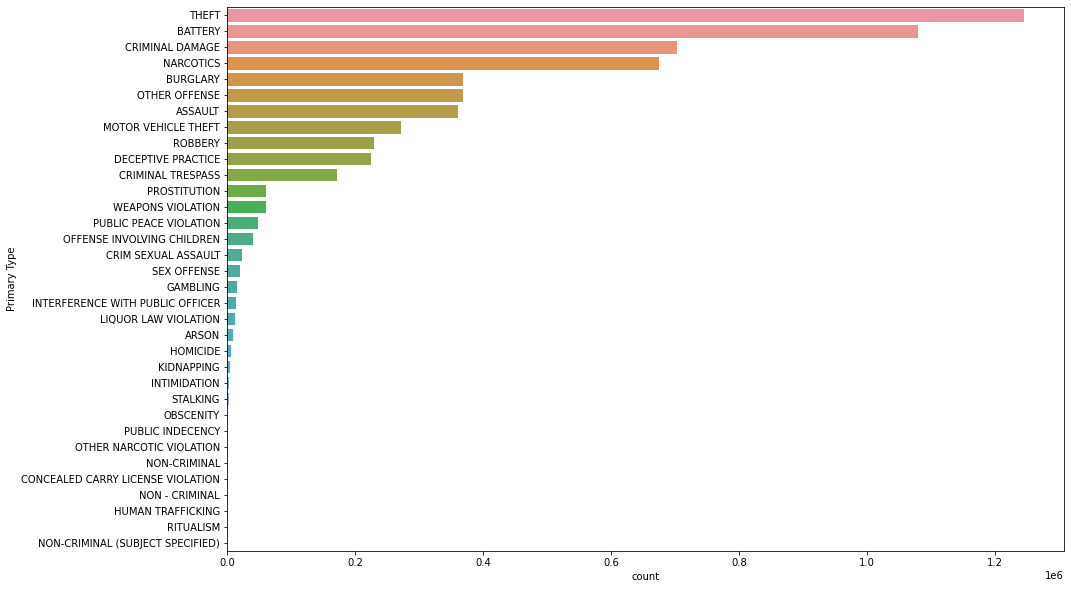

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=chicago_df,y='Primary Type', order = chicago_df['Primary Type'].value_counts().index)
plt.show()

### 어디에서 가장 범죄가 많이 발생했는지, 범죄 장소(Location Descripton) 로 비주얼라이징 하시오.

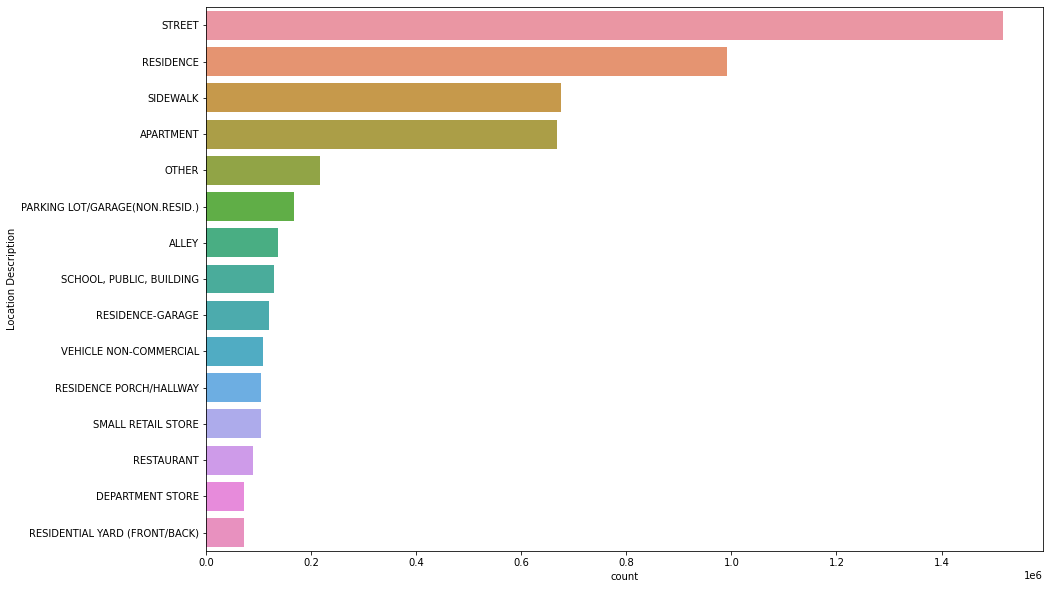

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=chicago_df,y='Location Description', order = chicago_df['Location Description'].value_counts().head(15).index)
plt.show()

In [ ]:
chicago_df['Location Description'].describe()

count     6015793
unique        161
top        STREET
freq      1517724
Name: Location Description, dtype: object

### 데이터를 주기별로 분석해 보자

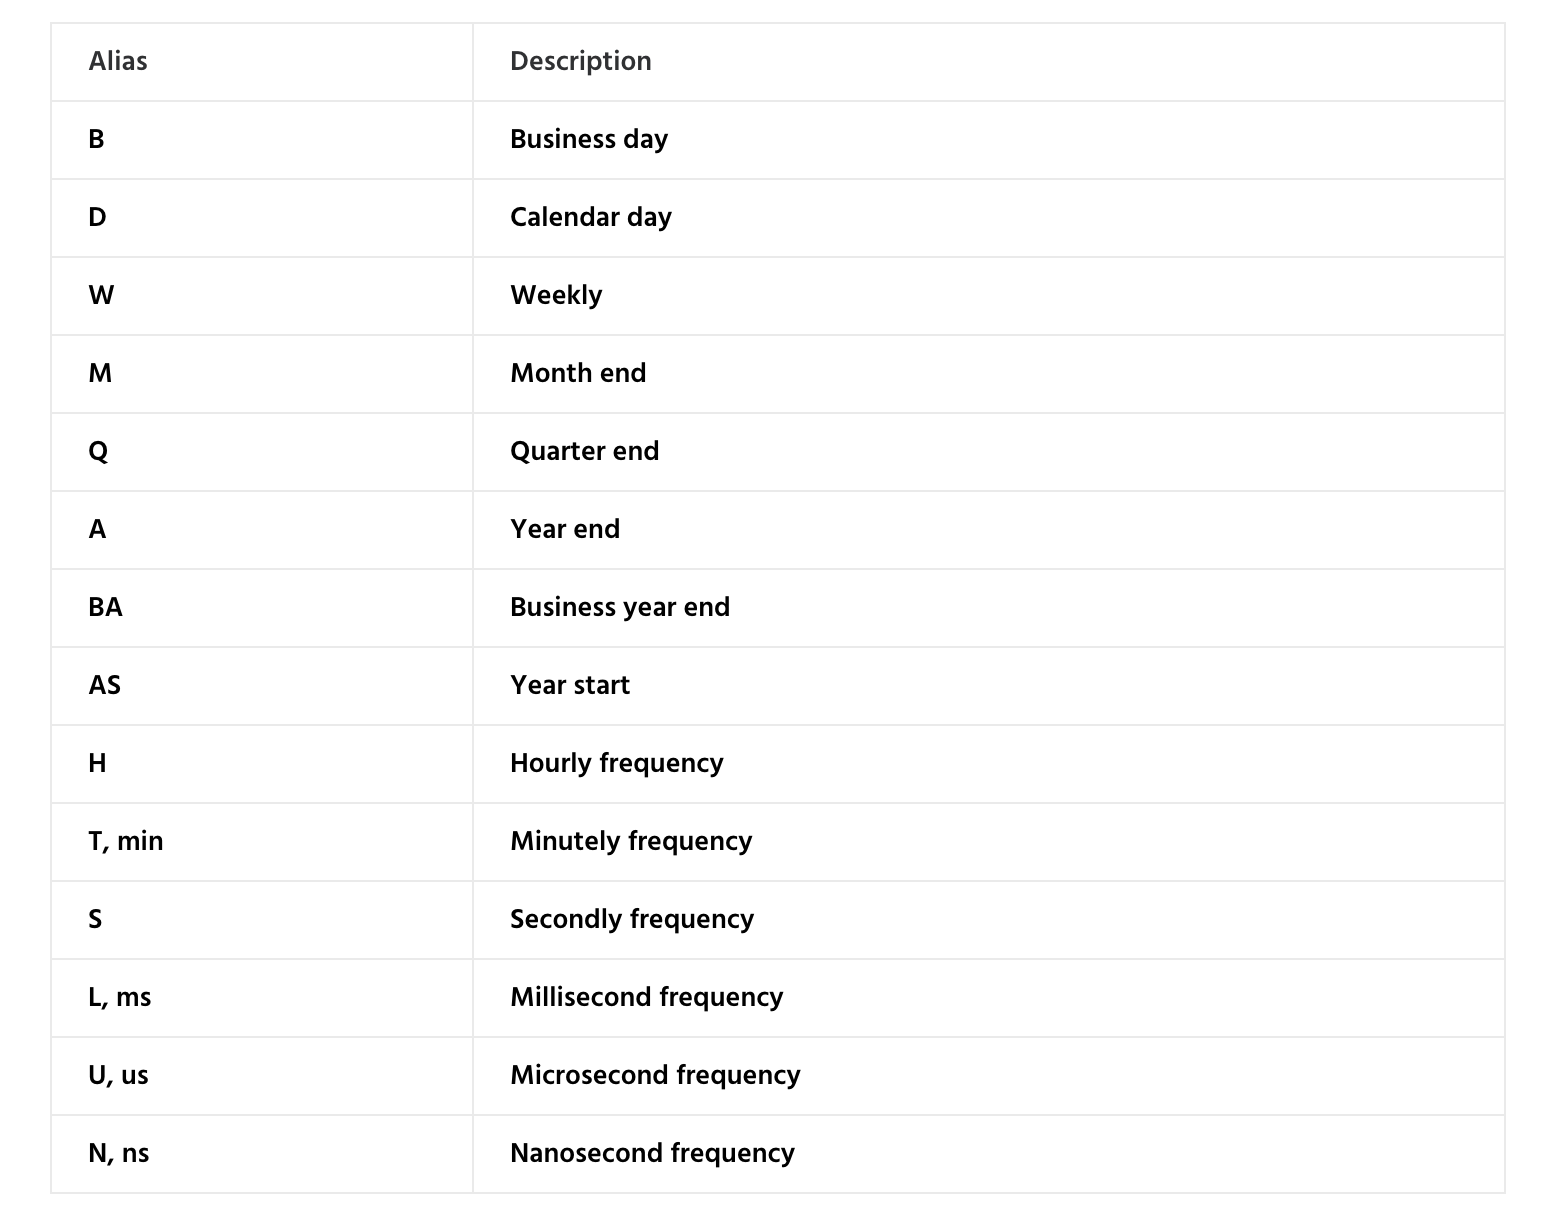

In [ ]:
# resample  'Y' 는 년도다. 년도로 리샘플한 후, 각 년도별 몇개의 범죄 데이터를 가지고 있는지 확인한다.

year_df  = chicago_df.resample('Y').size


() #이게 가능한 이유는 데이트타임인데그라고 나누어주었기 때문에 정리가 가능한 것이다. 


()

In [ ]:
0# 위의 데이터를 plot 으로 시각화 한다. 범죄횟수를 눈으로 

0

In [ ]:
# 월별 범죄 발생 건수를 확인하자.
chicago_df['Date'].sort_values(ascending = False)


Date
2017-01-18 23:49:00   2017-01-18 23:49:00
2017-01-18 23:45:00   2017-01-18 23:45:00
2017-01-18 23:40:00   2017-01-18 23:40:00
2017-01-18 23:35:00   2017-01-18 23:35:00
2017-01-18 23:30:00   2017-01-18 23:30:00
                              ...        
2005-01-01 00:00:00   2005-01-01 00:00:00
2005-01-01 00:00:00   2005-01-01 00:00:00
2005-01-01 00:00:00   2005-01-01 00:00:00
2005-01-01 00:00:00   2005-01-01 00:00:00
2005-01-01 00:00:00   2005-01-01 00:00:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [ ]:
# 월별 범죄 발생 건수도 plot 으로 시각화 하자.


month_df = chicago_df.resample('M').size()

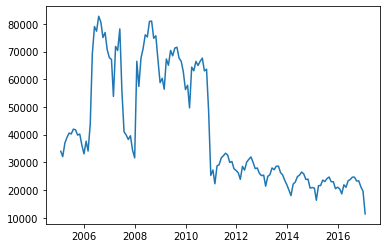

In [ ]:
# 분기별 범죄 건수도 확인하자.
plt.plot(month_df)
plt.show()

In [ ]:
# 분기별 범죄 건수도 시각화 하자.
q_df=chicago_df.resample('Q').size()

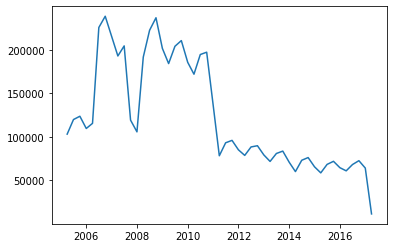

In [ ]:
plt.plot(q_df)
plt.show()

# STEP #3: 데이터 준비

### 월별로(매달 말일) 주기로 하여 데이터프레임을 만들고, 인덱스를 리셋하시오.

In [ ]:
chicago_prophet = month_df.reset_index()

In [ ]:
chicago_prophet.head()

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572


In [ ]:
chicago_prophet.columns = ['ds','y']

In [ ]:
chicago_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


### 프로펫 라이브러리를 사용하려면, 날짜 컬럼은 'ds' 로, 에측하려는 수치는 'y'로 바꿔야 합니다(필수).

# STEP #4: Prophet 으로 예측하기

In [ ]:
m = Prophet()


In [ ]:
m.fit(chicago_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods= 36, freq='M')

In [ ]:
forecast = m.predict(future)

In [ ]:
# 차트로 확인하시오.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60463.432502,37625.191838,73760.360948,60463.432502,60463.432502,-4803.616721,-4803.616721,-4803.616721,-4803.616721,-4803.616721,-4803.616721,0.0,0.0,0.0,55659.815781
1,2005-02-28,60332.766196,33906.973585,67772.053851,60332.766196,60332.766196,-9480.730557,-9480.730557,-9480.730557,-9480.730557,-9480.730557,-9480.730557,0.0,0.0,0.0,50852.035639
2,2005-03-31,60188.099929,43330.219133,75813.739499,60188.099929,60188.099929,-1254.934724,-1254.934724,-1254.934724,-1254.934724,-1254.934724,-1254.934724,0.0,0.0,0.0,58933.165205
3,2005-04-30,60048.100316,44784.532972,77089.885816,60048.100316,60048.100316,1114.162021,1114.162021,1114.162021,1114.162021,1114.162021,1114.162021,0.0,0.0,0.0,61162.262337
4,2005-05-31,59903.434049,50258.709634,82307.318529,59903.434049,59903.434049,5396.906083,5396.906083,5396.906083,5396.906083,5396.906083,5396.906083,0.0,0.0,0.0,65300.340133


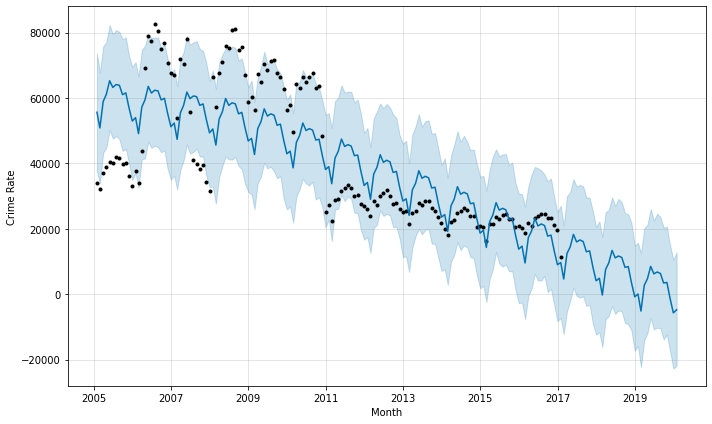

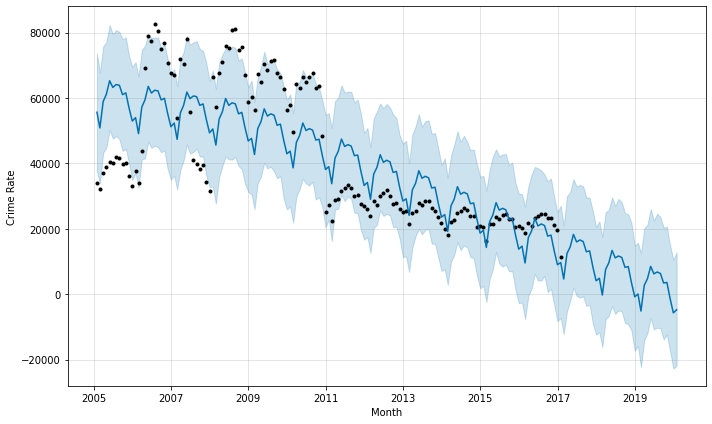

In [ ]:
m.plot(forecast,xlabel='Month',ylabel='Crime Rate')

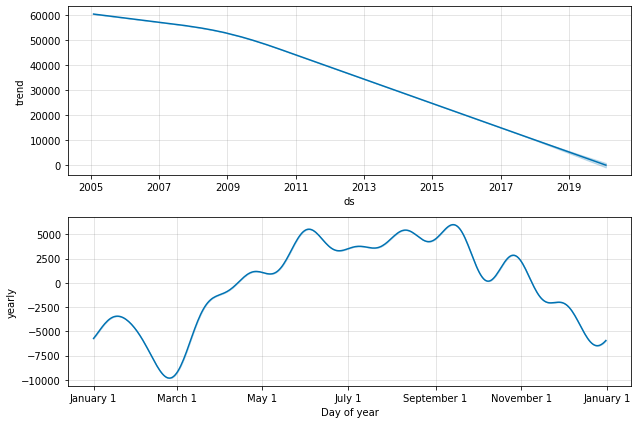

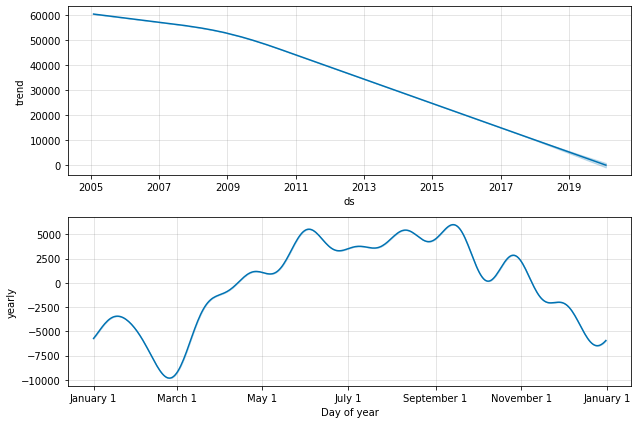

In [ ]:
m.plot_components(forecast)

### [freq 조절 가능한 문자 ](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)

[페이스북 프로펫 페이지 예시](https://facebook.github.io/prophet/docs/non-daily_data.html)

In [ ]:
# 36개월로 해서 예측해보자.
